In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.shape

(16719, 16)

# Video Game Sales Data

The dataset I will be using here is a subset of video game sales data as of December 22, 2016, scraped from the site vgchartz.com.  The dataset contains general information on the game (name, platform, release year) as well as sales data, in millions, broken up by region (NA, EU, JP, Other, and total or 'Global').  A smaller subset of the data contains review scores critical scoring from the review aggregator website metacritic.com.  The full, up to date source data can be found __[here](http://www.vgchartz.com/gamedb/)__. 

## Questions
__#1 What is the makeup of this list? Are there specific types of games that are overrepresented in this sample?__ <br>

To start off, I decided to just take a quick look at the dataset with some summary statistics.  Before diving into the fun stuff though, a little bit of data cleanup is needed.  I replaced the 'tbd' text string values in the <font color=red>User_Score</font> column in order to convert the column to a float and ensure that summary statistics could be applied to it.  I also decided to remove both null values as well as values > 2016 from the <font color=red>Year_of_Release</font> column.

In [33]:
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games[games['Year_of_Release'].notnull()]
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,0.536361,68.994363,26.441313,7.126330,163.015141
std,5.877050,0.818416,0.506696,0.311082,0.187994,1.558610,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


After cleaning there are 16,446 results, down from 16,719 to start.  As mentioned above, critical scoring only exists for roughly 48% of the total results and slightly lower for User Scoring.  A quick note about the scoring columns.  Metacritic normalizes all their scores into a score out of 100 but they also have a user score section where site readers can rate and review games.  That rubric (for some reason) is out of 10, which is why the means for User_Score (7.126) and Critic_Score (68.99) seem way off. <br>

Now, let's start diving into the data a bit.

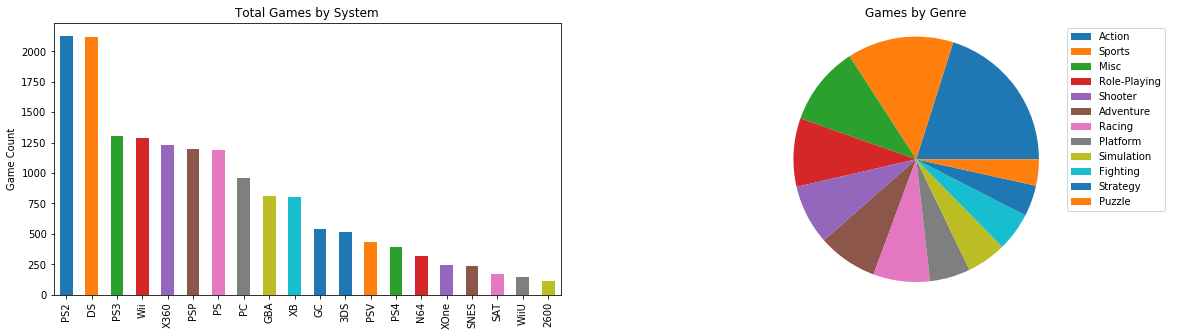

In [10]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
games.Platform.value_counts().head(20).plot(kind='bar')
plt.ylabel('Game Count')
plt.title('Total Games by System')

plt.subplot(1, 2, 2)
genre = games.Genre.value_counts()
plt.pie(genre)
plt.axis('equal')
plt.title('Games by Genre')
plt.legend(genre.index)

plt.show()

Looking at total games per system, two in particular stand out.  The PS2 (Playstation 2) and Nintendo DS both stand above the rest of the dataset in number of games on their systems.  This is, most likely, due to the enourmous popularity of the system, which are currently the __[top](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles)__ two selling consoles of all time.  <br>

Breaking down a count of games by genre also doesn't yield too many surprises.  Action is a fairly open ended genre, so it makes sense that the most games would fall into that bucket rather than something more specific like shooter or racing.  It would be interesting to see a similar breakdown of games within the action genre, as a lot of "Action" games can also be categorized as an "Action-Platformer" or "Action Role-Playing" game.  But alas, that data was not a part of this dataset.

__#2: What Games Sell? Are there any outliers?__ 

Before we dive fully, let's look at some summary statistics again, this time just for the sales data.

In [34]:
games.describe()[
    ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    ]

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000
mean,0.536361,0.264089,0.145945,0.078479,0.047593
std,1.558610,0.818416,0.506696,0.311082,0.187994
min,0.010000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,0.000000,0.000000,0.000000,0.000000
50%,0.170000,0.080000,0.020000,0.000000,0.010000
75%,0.470000,0.240000,0.110000,0.040000,0.030000
max,82.530000,41.360000,28.960000,10.220000,10.570000


As we with the chart above, global sales has a max value of 82.53 million units but the average for all units is far lower at around 0.536 million units with a standard deviation of ~1.5 million units.  Now judging by the line graph from above, it certainly looks like this 82 million unit game is an outlier, but let's check.

Text(0.5,1,'Top 20 Games Sold')

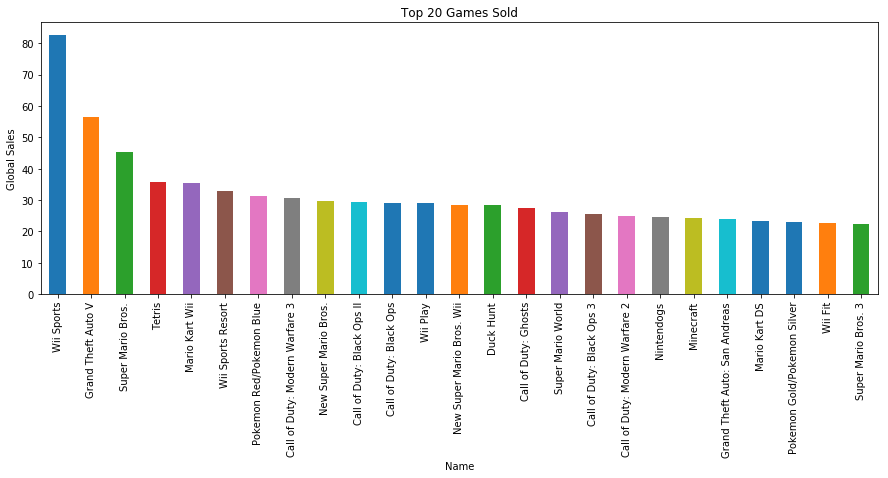

In [37]:
namegame = games.groupby('Name').aggregate(np.sum).sort_values(
    by=['Global_Sales'], ascending=False)
namegame.Global_Sales.head(25)[0:25].plot(kind='bar', figsize=(15, 5))
plt.ylabel('Global Sales')
plt.title('Top 20 Games Sold')

Wii Sports!  The popular bowling, tennis, baseball minigame collection towers above the rest of the games on this list by ~25 million units.  But why?  Unlike most games on this list, Wii Sports was bundled as a __[pack-in game](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles)__ for the system in all territories expect Japan and South Korea, meaning that they got the game with the system, regardless of whether or not they were actually planning on buying it.  So should it be disregarded?  It depends.  If I were to try and create a predictive sales model using this data I would want to remove it so that it doesn't skew the results, but for the purposes of this project, which is more of a look back at the top selling games in history, I think it's more interesting to keep it in.  Plus, while Wii Sports is the most prevalent "pack-in game" on this list.

__#3 Is there any relationship between games sales and scores? Does this relationship differ depending on other variables?__ 

While just looking at sales data alone is interesting, it's always more fun to try and figure out what drives those sales numbers. A couple of notes about the data below.  I removed Wii Sports from this set, as it's sales data is too much of an outlier and not representative of most games in this dataset.  Secondly, the above sales chart was grouped by game name, meaning it merged different version of the same game into 1 (Grand Theft Auto V, for example, has 5 different versions present in the dataset).  That view made sense when looking at total sales data for games but in this context, where the same game will review differently on different systems, it made sense to split them back out. <br>

Now, on to the data.

Text(0.5,0,'User Scores')

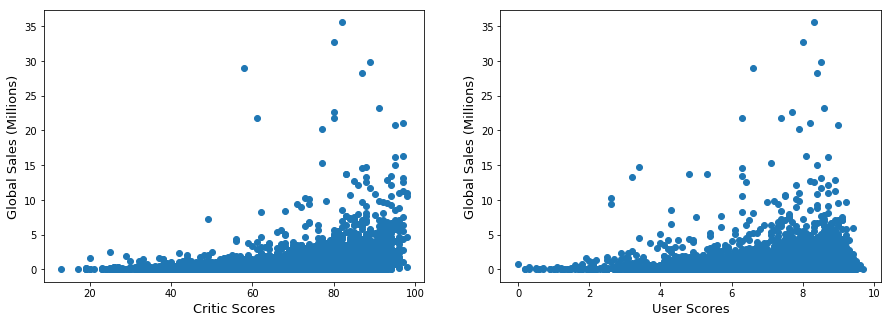

In [39]:
games_no_out = games[(games['Global_Sales'] <= 80.0)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=games_no_out['Critic_Score'], y=games_no_out['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('Critic Scores', fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(x=games_no_out['User_Score'], y=games_no_out['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('User Scores', fontsize=13)

Now while this is only a subset of the full data (only ~8k games in this dataset included scores), there does seems to be some positive relationship between higher scores and sales.  The skew seems to be slightly less pronounced in the User Scores chart, where there are a number of higher-selling games that have low scores.  Overall, this distribution could represent some of the difference between how paid reviewerss (aka critics) score games versus how regular people do it. 

In [64]:
action_games = games[(games['Genre'] == 'Action')]
shooter_games = games[(games['Genre'] == 'Shooter')]

action_sample = action_games.dropna(subset=['Critic_Score'])
shooter_sample = shooter_games.dropna(subset=['Critic_Score'])

print(ttest_ind(shooter_sample['Critic_Score'], action_sample['Critic_Score'], equal_var=False))

Ttest_indResult(statistic=6.179354860065784, pvalue=7.936928593994963e-10)


## Further Research



This dataset is full of interesting data that I did not get a chance to really dive into during this project. While there are myriad questions I'd love to ask, here are a 3 that 
__#1 Can we accurately predict what types of games will sell based on the dataset here?__ <br>
__#2 How much is a change in type of game worth in terms of sales or score?__ <br>
__#3 




In the future, I would love to try and use it to predict what types of games sell best.  How much do things like system install base or genre matter?  I would also like to really dive into the relationship between scoring and game sales and see if different subsets of game groups respond differently to positive or negative scoring.  Furthermore on scoring, the difference in distribution between critic scores and user scores bares further investigation.  Would the data look different if it were more complete?  It would be interesting to 

In [28]:
games_critics = games.dropna(subset=['Critic_Score'])
games_critics.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,6894.000000,6894.000000
mean,2007.192785,0.354536,0.209798,0.055910,0.072935,0.693461,68.994363,26.441313,7.184378,174.392370
std,4.189425,0.902590,0.640720,0.267412,0.251262,1.831295,13.920060,19.008136,1.439806,584.872155
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.090000,60.000000,12.000000,6.500000,11.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.250000,71.000000,22.000000,7.500000,27.000000
75%,2010.000000,0.340000,0.180000,0.010000,0.060000,0.660000,79.000000,36.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [132]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [133]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [134]:
games.shape

(16719, 16)

In [189]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [190]:
bad_data = games[~(games['Year_of_Release'] <= 2017.0)]
bad_data.shape

(270, 16)

Potential questions
1. What games sell?
    - By genre
    - Platform
    - 
2. Is there any relationship between critical scores and sales?
    - What about user scores?
    - By region?
    
3. Have the developers/publishers that make games changed over time?
   

Text(0.5,1,'Top 20 Games Sold')

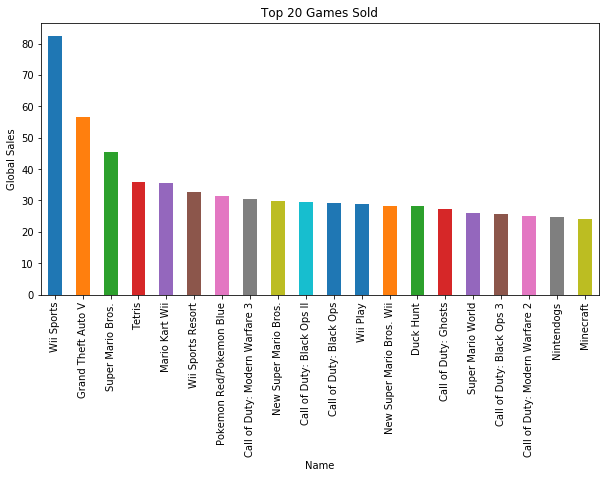

In [37]:
namegame = games.groupby('Name').aggregate(np.sum).sort_values(by=['Global_Sales'], ascending=False)
namegame.Global_Sales.head(20)[0:20].plot(kind='bar', figsize=(10,5))
plt.ylabel('Global Sales')
plt.title('Top 20 Games Sold')

In [9]:
# Best practice not to create new dataframes when you don't need to
release[['Global_Sales', 'NA_Sales']].sort_values('Global_Sales', ascending=False).head(10)

#release[['Global_Sales', 'NA_Sales']].sort_values('NA_Sales', ascending=False).head(10)

# joining two dataframes
# forecast_daily.join(sales_data_daily.set_index('ds'), on='ds')

# adding a count column
# sales_history.groupby(['Date']).size().reset_index(name='y')

NameError: name 'release' is not defined

In [13]:
top_games = games.groupby('Name').aggregate(np.sum).sort_values(by=['Global_Sales'], ascending=False)
top_games[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].head(10)

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Wii Sports,82.53,41.36,28.96,3.77,8.45
Grand Theft Auto V,56.57,23.84,23.42,1.42,7.90
Super Mario Bros.,45.31,32.48,4.88,6.96,0.99
Tetris,35.84,26.17,2.95,6.03,0.69
Mario Kart Wii,35.52,15.68,12.76,3.79,3.29
Wii Sports Resort,32.77,15.61,10.93,3.28,2.95
Pokemon Red/Pokemon Blue,31.37,11.27,8.89,10.22,1.00
Call of Duty: Modern Warfare 3,30.59,15.54,11.15,0.62,3.29
New Super Mario Bros.,29.80,11.28,9.14,6.50,2.88


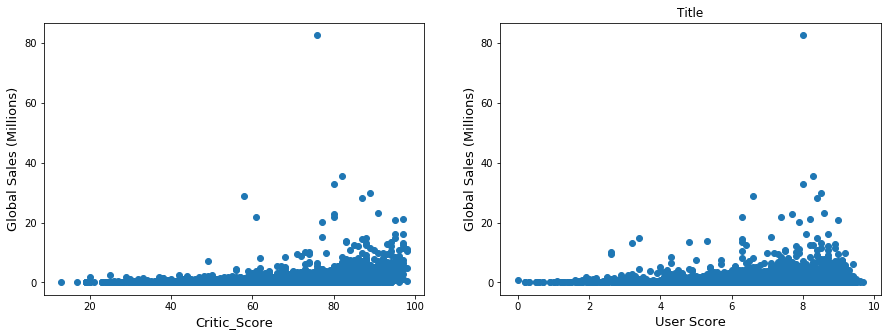

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = games['Critic_Score'], y = games['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(x = games['User_Score'], y = games['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('User Score', fontsize=13)
plt.title('Title')

plt.show()

Text(0,0.5,'Games Sold (in millions)')

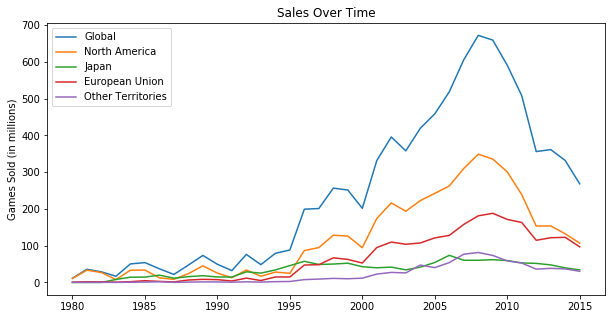

In [26]:
drop = games[(games['Year_of_Release'] < 2016.0)]
release = drop.groupby('Year_of_Release').aggregate(np.sum)
#print(release)

plt.figure(figsize=(10, 5))
plt.plot(release['Global_Sales'])
plt.plot(release['NA_Sales'])
plt.plot(release['JP_Sales'])
plt.plot(release['EU_Sales'])
plt.plot(release['Other_Sales'])

plt.legend(['Global', 'North America', 'Japan', 'European Union', 'Other Territories'])
plt.title('Sales Over Time')
plt.ylabel('Games Sold (in millions)')

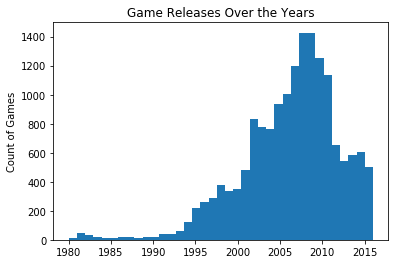

In [28]:
plt.hist(games['Year_of_Release'], bins=37)
plt.title('Game Releases Over the Years')
plt.ylabel('Count of Games')
plt.show()

In [31]:
# After the gym, statistical test for data with scores to the rest of the population.  
# This seems like a perfect way to use a t test.
games_critics = games.dropna(subset=['Critic_Score'])

from scipy.stats import ttest_ind
print(ttest_ind(games_critics['Critic_Score'], games_critics['Global_Sales'], equal_var=False))

Ttest_indResult(statistic=434.65259038973176, pvalue=0.0)


In [60]:
pop1 = games[(games['Genre'] == 'Action')]
pop2 = games[(games['Genre'] == 'Shooter')]

sample1 = pop1.dropna(subset=['Critic_Score'])
sample2 = pop2.dropna(subset=['Critic_Score'])

print(ttest_ind(sample2['Critic_Score'], sample1['Critic_Score'], equal_var=False))

Ttest_indResult(statistic=6.179354860065784, pvalue=7.936928593994963e-10)


Text(0.5,0,'User Scores')

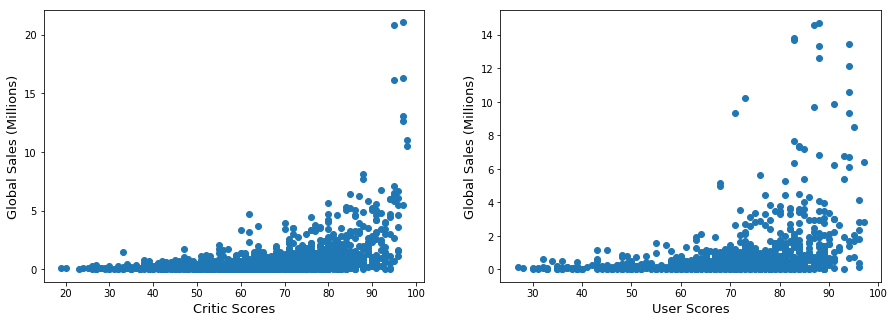

In [66]:
action_games = games[(games['Genre'] == 'Action')]
shooter_games = games[(games['Genre'] == 'Shooter')]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=action_games['Critic_Score'], y=action_games['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('Critic Scores', fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(x=shooter_games['Critic_Score'], y=shooter_games['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('User Scores', fontsize=13)